### Problem 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial import distance_matrix
import heapq 

In [2]:
class HierarchicalClustering:
    def __init__(self, linkage='average',no_of_clusters=1):
        self.linkage = linkage
        self.no_of_clusters=no_of_clusters
        self.labels_ = None

    def fit(self, X):
        n_samples = len(X)
        self.labels_ = np.arange(n_samples)
        
        # Calculate initial distance matrix
        dist_matrix = distance_matrix(X, X)
        np.fill_diagonal(dist_matrix, np.inf)  
        
        # Initialize priority queue 
        pq = []
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                heapq.heappush(pq, (dist_matrix[i][j], (i, j)))
        
        clusters = {i: [i] for i in range(n_samples)}  # Start with each point as its own cluster
        
        while len(clusters) > self.no_of_clusters:
            # Get the closest pair
            _, (c1, c2) = heapq.heappop(pq)
            
            # Skip if cluster was already merged
            if c1 not in clusters or c2 not in clusters:
                continue
            
            # Merge clusters
            new_cluster = clusters[c1] + clusters[c2]
            del clusters[c1]
            del clusters[c2]
            new_cluster_id = max(clusters.keys(), default=-1) + 1
            clusters[new_cluster_id] = new_cluster
            
            # Updating labels
            for idx in new_cluster:
                self.labels_[idx] = new_cluster_id
            
            # Update distance matrix and priority queue
            for other_cluster in clusters.keys():
                if other_cluster == new_cluster_id:
                    continue
                
                # Calculate new distance using the specified linkage method
                if self.linkage == 'single':
                    new_dist = min(dist_matrix[i][j] for i in new_cluster for j in clusters[other_cluster])
                elif self.linkage == 'average':
                    all_dists = [dist_matrix[i][j] for i in new_cluster for j in clusters[other_cluster]]
                    new_dist = np.mean(all_dists)
                else:
                    raise ValueError(" linkage type not supported.")
                
                heapq.heappush(pq, (new_dist, (new_cluster_id, other_cluster)))

In [4]:
moons_df = pd.read_csv('HW_2B_Data/moons.csv')
X=moons_df.values

Silhouette Score for K=2: 0.4466


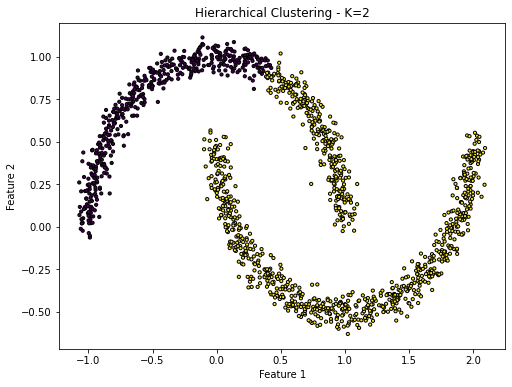

Silhouette Score for K=5: 0.4753


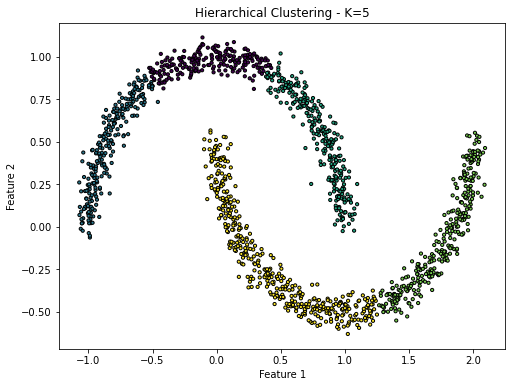

Silhouette Score for K=10: 0.4941


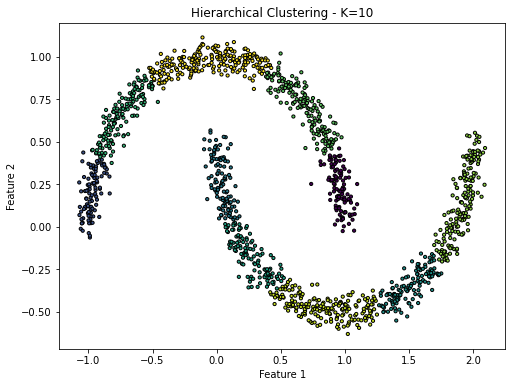

In [9]:
for k in [2,5,10]:
    model = HierarchicalClustering(linkage='average',no_of_clusters=k)
    model.fit(X)
    labels = model.labels_
    silhouette = silhouette_score(X, labels)
    print(f'Silhouette Score for K={k}: {silhouette:.4f}')

    # Plot Results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',edgecolors='k', s=10)
    plt.title(f'Hierarchical Clustering - K={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()